In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

df = pd.read_csv('/content/drive/MyDrive/FIAP/Machine Learning/Regressão Logística/WineQT.csv')
# df['quality'] = df.apply(lambda row: 2 if row['quality'] > 6 else (1 if row['quality'] > 5 else 0), axis=1)
df['quality'] = df.apply(lambda row: 1 if row['quality'] > 5 else 0, axis=1)
df['quality'].value_counts()


,count
quality,
1,621
0,522


In [ ]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4


In [ ]:
x = df.drop('quality', axis='columns')
y = df['quality']
x_scaled = preprocessing.StandardScaler().fit(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

# lbfgs, yes
# liblinear,no
# newton-cg,yes
# newton-cholesky,no
# sag,yes
# saga,yes

d = {'lbfgs':0, 'liblinear':0, 'newton-cg':0,  'newton-cholesky':0, 'sag':0, 'saga':0}

for k in d.keys():
  classifier = LogisticRegression(max_iter=100000, solver=k)
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x)
  print(f"Accuracy {k}:", accuracy_score(y, y_pred))
  d[k] = accuracy_score(y, y_pred)

classifier = LogisticRegression(max_iter=100000, solver=max(d, key=d.get))
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x)
print(f"Chosen one ",max(d, key=d.get) ,":", accuracy_score(y, y_pred))
d[k] = accuracy_score(y, y_pred)

Accuracy lbfgs: 0.7611548556430446
Accuracy liblinear: 0.7471566054243219
Accuracy newton-cg: 0.7602799650043744
Accuracy newton-cholesky: 0.7602799650043744
Accuracy sag: 0.6754155730533683
Accuracy saga: 0.6596675415573053
Chosen one  lbfgs : 0.7611548556430446


<Axes: >

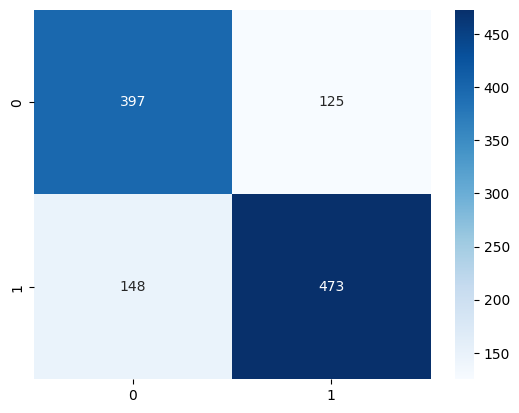

In [ ]:
y_pred = classifier.predict(x)
matrix = confusion_matrix(y, y_pred)
# sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Reds')
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")
# matrix


In [ ]:
classifier.coef_

array([[ 1.30058590e-01, -2.73162266e+00, -9.80636189e-01,
        -1.90373110e-02, -7.46512850e-01,  2.17334742e-02,
        -1.44507236e-02, -8.69550662e-02,  1.31603159e-01,
         2.21385279e+00,  9.89159086e-01, -8.66606285e-05]])

In [ ]:
from sklearn.feature_selection import chi2
scores, pvalues = chi2(x, y)
result = pd.DataFrame({'X':x.columns, 'pvalues':pvalues})
print(result)

                       X        pvalues
0          fixed acidity   6.926442e-02
1       volatile acidity   5.873726e-03
2            citric acid   4.652721e-02
3         residual sugar   8.238092e-01
4              chlorides   5.857462e-01
5    free sulfur dioxide   6.141692e-10
6   total sulfur dioxide  1.234377e-300
7                density   9.919803e-01
8                     pH   9.646066e-01
9              sulphates   9.629963e-02
10               alcohol   6.224229e-07
11                    Id   0.000000e+00


In [ ]:
tp = matrix[1,1]
tn = matrix[0,0]
fp = matrix[0,1]
fn = matrix[1,0]

acuracia = ( tp + tn ) / ( tp + tn + fp + fn )
print(acuracia)
print(accuracy_score(y, y_pred))

0.7611548556430446
0.7611548556430446


In [ ]:
# precision (sensibilidade)
# quando uma classe é previsto, qual a frequência de acerto?
precision = tp / float(tp + fp)
print(precision)
print(metrics.precision_score(y, y_pred))

0.7909698996655519
0.7909698996655519


In [ ]:
# recall (positives) | specifity (negatives)
# proporção de verdadeiros entre todos os verdadeiros
recall = tp / float(fn + tp)
print(recall)
print(metrics.recall_score(y, y_pred))

0.7616747181964574
0.7616747181964574


In [ ]:
# f1 score
# combinação de precision e recall
f1 = 2*tp  / (2*tp + fp + fn)
print(f1)
print(metrics.f1_score(y, y_pred))


0.7760459392945037
0.7760459392945037


In [ ]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       522
           1       0.79      0.76      0.78       621

    accuracy                           0.76      1143
   macro avg       0.76      0.76      0.76      1143
weighted avg       0.76      0.76      0.76      1143



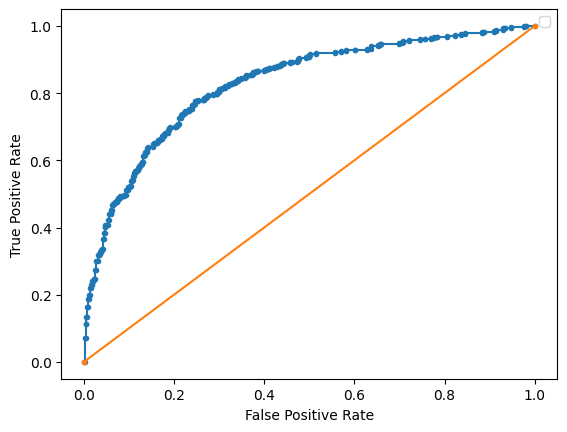

In [ ]:
from sklearn.metrics import roc_curve

# predict probabilities
y_proba = classifier.predict_proba(x)
y_proba_1 = y_proba[:, 1]
n_prob = [0 for _ in range(len(y))]

# calculate roc curves
f_pr_1, t_pr_1, _ = roc_curve(y, y_proba_1)
n_fpr, n_tpr, _ = roc_curve(y, n_prob)

# plot the roc curve for the model
plt.plot(f_pr_1, t_pr_1, marker='.')
plt.plot(n_fpr, n_tpr, marker='.')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()